In [199]:
!pip install -q kaggle

In [200]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [201]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [202]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [203]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [204]:
!kaggle datasets download -d 'shuofxz/titanic-machine-learning-from-disaster'

Dataset URL: https://www.kaggle.com/datasets/shuofxz/titanic-machine-learning-from-disaster
License(s): DbCL-1.0
titanic-machine-learning-from-disaster.zip: Skipping, found more recently modified local copy (use --force to force download)


In [205]:
import zipfile

In [206]:
dataset_zip = zipfile.ZipFile('titanic-machine-learning-from-disaster.zip', 'r')
dataset_zip.extractall()
dataset_zip.close()

**Ini adalah proyek analisis titanic survival**

In [207]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### **READ CSV**

In [208]:
df= pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### **STATISTIKA** **DESKRIPTIF**

In [209]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## **CHECK VALUE YANG KOSONG**

In [210]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### **DATA PREPOCESSING**

### **MENGISI data yang kosong pada AGE dengan MEDIAN**

In [211]:
df['Age'] = df['Age'].fillna(df['Age'].median())

## **Mengisi data yang kosong pada kolom EMBARKED dengan MODUS**

In [212]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## **Drop kolom CABIN Karena banyak yang kosong plus DATA CABIN GA Terlalu penting**

In [213]:
df = df.drop('Cabin', axis=1)

# **Check Hasil propocess**

In [214]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# **EXPLATORY DATA ANALYST (EDA)**

# **import library untuk EDA**

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

## **Analisi yang SURVIVED sama yang TIDAK SURVIVED**

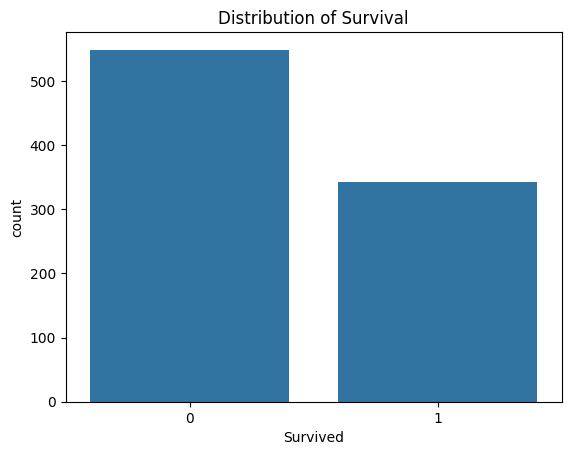

In [216]:
sns.countplot(data=df, x='Survived')
plt.title('Distribution of Survival')
plt.show()

Dilihat dari diagram diatas dari kejadian titanic lebih banyak orang-orang yang tidak survived.

# **Berikut ini merupakan presentase yang survived dan tidak survived**

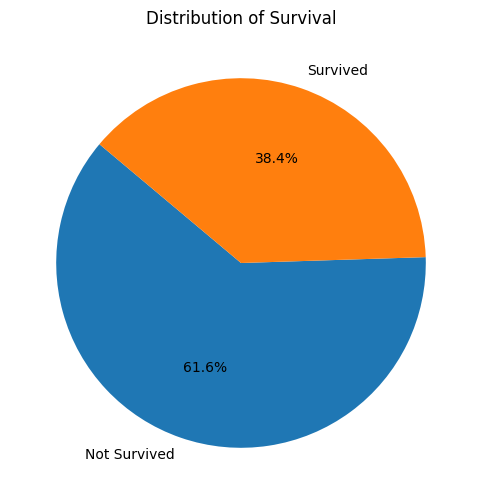

In [217]:
# Hitung jumlah setiap kategori (Survived dan Not Survived)
survival_counts = df['Survived'].value_counts()

# Label untuk setiap bagian pie chart
labels = ['Not Survived', 'Survived']

# Diagram lingkaran
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Survival')
plt.show()

# **Visualisasi data yang survived dan tidak survived berdasarkan gender dibawah ini:**

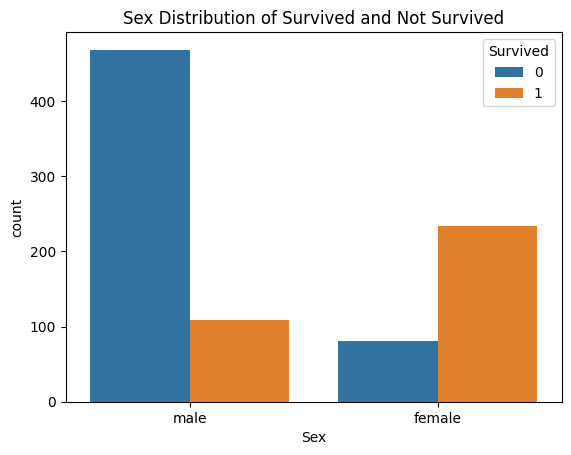

In [218]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Sex Distribution of Survived and Not Survived')
plt.show()

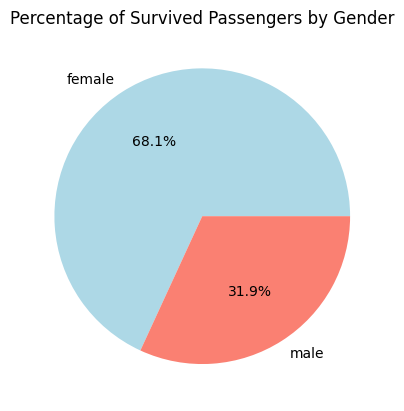

In [219]:
survived_sex_counts = df[df['Survived'] == 1]['Sex'].value_counts()
survived_sex_counts.plot.pie(autopct='%1.1f%%', labels=survived_sex_counts.index, colors=['lightblue', 'salmon'])
plt.title('Percentage of Survived Passengers by Gender')
plt.ylabel('')  # Menghilangkan label y untuk kejelasan
plt.show()

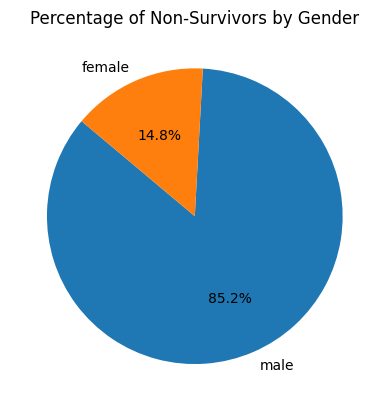

In [220]:
# Filter data untuk penumpang yang tidak selamat
not_survived = df[df['Survived'] == 0]

# Hitung jumlah penumpang yang tidak selamat berdasarkan gender
gender_counts = not_survived['Sex'].value_counts()

# Membuat diagram lingkaran
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Non-Survivors by Gender')
plt.show()

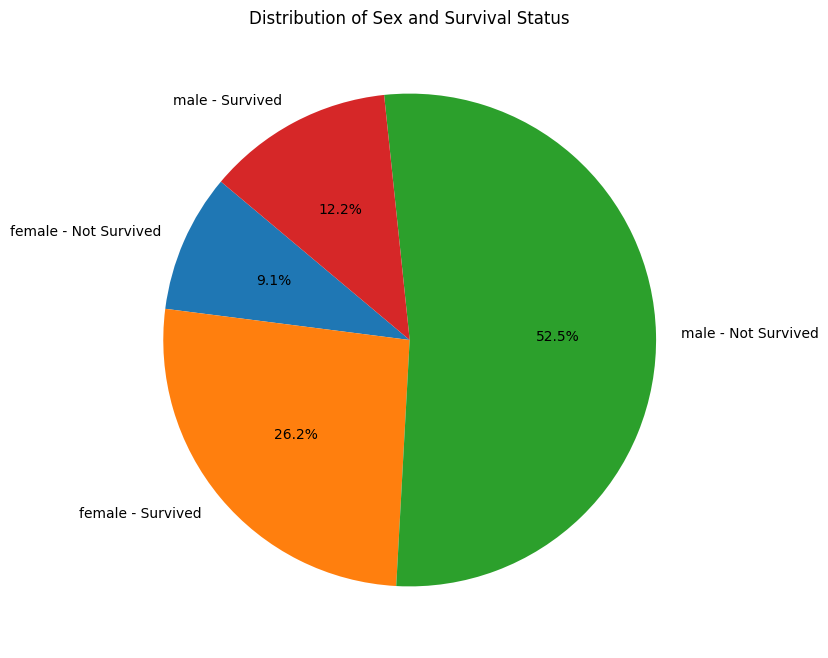

In [221]:
# Hitung jumlah setiap kategori (Sex dan Survived)
grouped_data = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

# Ganti nilai numerik Survived menjadi kategori agar lebih mudah dibaca
grouped_data['Survived'] = grouped_data['Survived'].map({0: 'Not Survived', 1: 'Survived'})

# Gabungkan kolom Sex dan Survived untuk label pie chart
grouped_data['Label'] = grouped_data['Sex'] + ' - ' + grouped_data['Survived']

# Persentase setiap kategori
plt.figure(figsize=(8, 8))
plt.pie(grouped_data['Count'], labels=grouped_data['Label'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sex and Survival Status')
plt.show()

# **Yang survived dan tidak survived berdasarkan usianya **

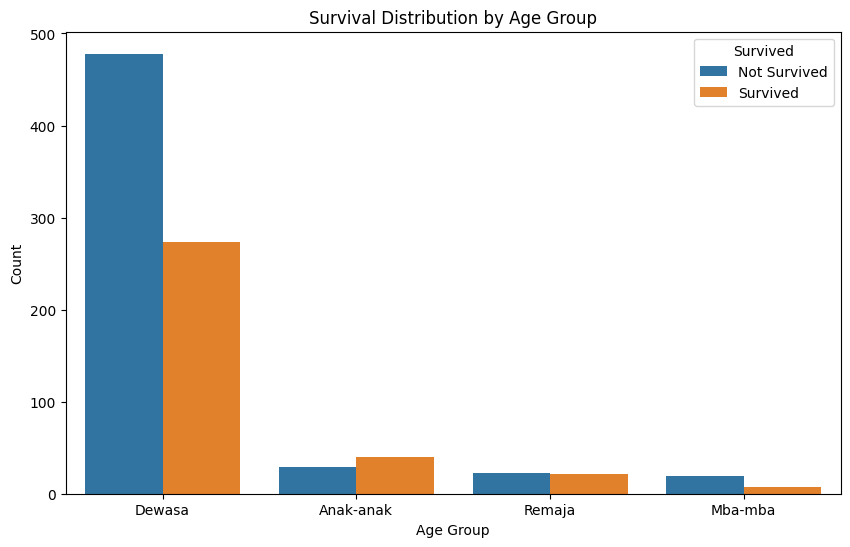

In [222]:
# Membuat kolom baru 'AgeGroup' berdasarkan rentang usia
def age_group(age):
    if age < 13:
        return 'Anak-anak'
    elif age < 18:
        return 'Remaja'
    elif age < 60:
        return 'Dewasa'
    else:
        return 'Mba-mba'

# Terapkan fungsi age_group untuk membuat kolom AgeGroup
df['AgeGroup'] = df['Age'].apply(age_group)

# Visualisasikan dengan countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeGroup', hue='Survived')
plt.title('Survival Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

# **YANG SURVIVED DAN TIDAK SURVIVED BERDASARKAN PCLASS**

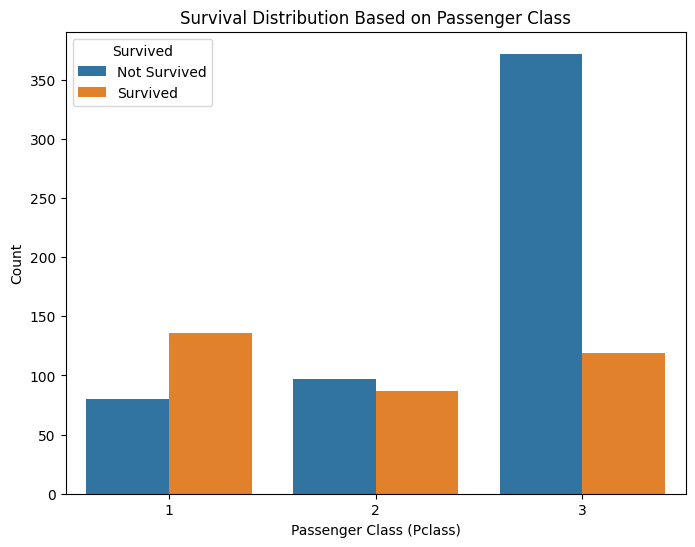

In [223]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Distribution Based on Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

# **FEATURE ENGINEERING**

## **Label encoder untuk mengubah data kategorik menjadi data numerik**

In [224]:
from sklearn.preprocessing import LabelEncoder

In [225]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['AgeGroup'] = le.fit_transform(df['AgeGroup'])


In [226]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,1


# **Feature selection**

In [227]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [228]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [229]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# **Train Test Split (Memisahkan data untuk dilatih dan diuji)**

In [230]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Data train**

In [231]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [232]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


# **Data test**

In [233]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2
773,3,1,28.0,0,0,7.2250,0
25,3,0,38.0,1,5,31.3875,2
84,2,0,17.0,0,0,10.5000,2


In [234]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


# **Data Modelling**

In [235]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

# **Menggunakan KNN**

In [236]:
# Import pustaka yang dibutuhkan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [251]:
# Membuat model KNN dengan jumlah tetangga (k) = 3
model_knn = KNeighborsClassifier(n_neighbors=3)


In [252]:
# Melatih model dengan data train
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**EVALUATION**

In [239]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **memprediksi data test menggunakan model random forest**

In [253]:
y_pred = model.predict(X_test)

In [254]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


In [255]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [256]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[89 16]
 [18 56]]


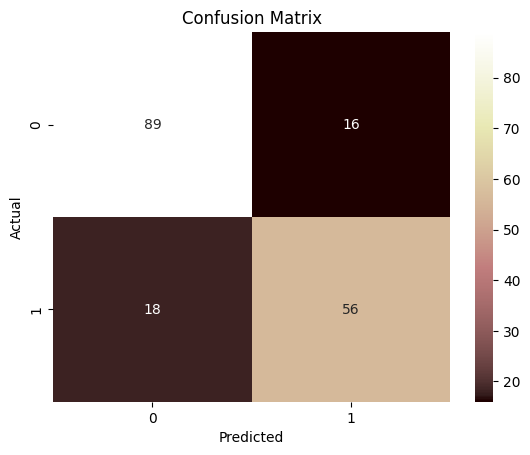

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [258]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# **mempredikisi data dengan menggunkan KNN**


In [259]:
# Prediksi dengan data uji
y_pred_knn = model_knn.predict(X_test)

In [260]:
# Evaluasi hasil
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

KNN Accuracy: 0.72


In [261]:
# Confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Confusion Matrix:
[[91 14]
 [37 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       105
           1       0.73      0.50      0.59        74

    accuracy                           0.72       179
   macro avg       0.72      0.68      0.69       179
weighted avg       0.72      0.72      0.70       179



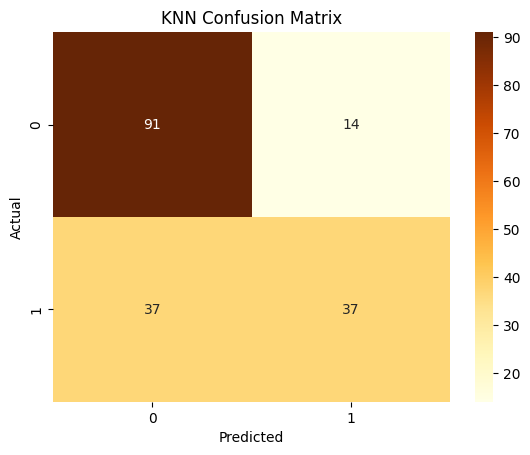

In [262]:
# Visualisasi confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

In [263]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       105
           1       0.73      0.50      0.59        74

    accuracy                           0.72       179
   macro avg       0.72      0.68      0.69       179
weighted avg       0.72      0.72      0.70       179

